## 1

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns=["ID", "Diagnosis"]+[f"Feature_{i}" for i in range(1, 31)]
df=pd.read_csv(url, header=None, names=columns)

In [146]:
df.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
df.drop("ID", axis=1, inplace=True)

In [148]:
print(df.isnull().sum())

Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


In [149]:
print(df.describe())

        Feature_1   Feature_2   Feature_3    Feature_4   Feature_5  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

        Feature_6   Feature_7   Feature_8   Feature_9  Feature_10  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   

In [150]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

## 2

In [152]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis'] 

In [153]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3

In [156]:
model = LogisticRegression()

In [157]:
model.fit(X_train, y_train)

LogisticRegression()

In [158]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [159]:
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")


Training Metrics:
Accuracy: 0.9868
Precision: 0.9880
Recall: 0.9763
F1-Score: 0.9821


## 4

In [161]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [162]:
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Test Metrics:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


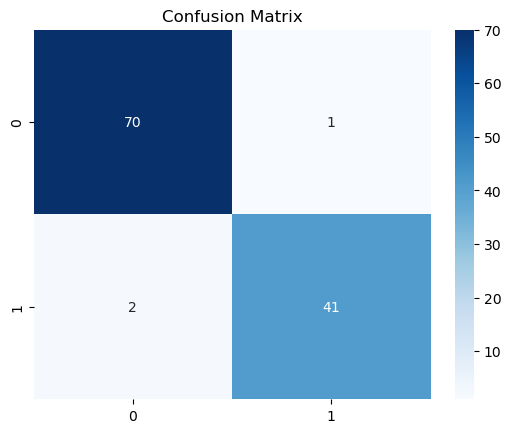

In [163]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [164]:
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

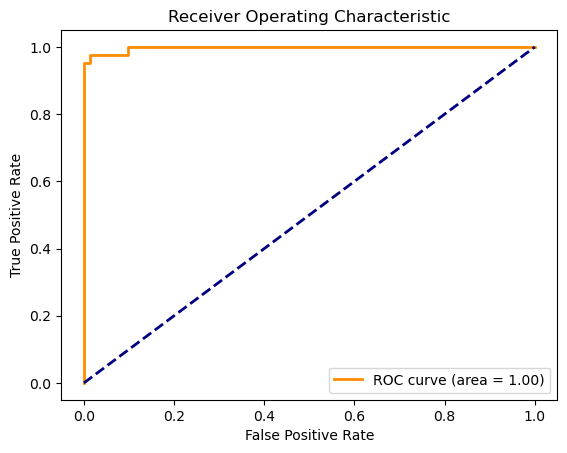

In [165]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [166]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print("\nLogistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
            Coefficient
Feature_1      0.434647
Feature_2      0.397194
Feature_3      0.396070
Feature_4      0.469990
Feature_5      0.067394
Feature_6     -0.526717
Feature_7      0.807676
Feature_8      1.107711
Feature_9     -0.241538
Feature_10    -0.078447
Feature_11     1.250573
Feature_12    -0.188993
Feature_13     0.589886
Feature_14     0.919877
Feature_15     0.316570
Feature_16    -0.669066
Feature_17    -0.171077
Feature_18     0.314317
Feature_19    -0.504999
Feature_20    -0.611761
Feature_21     0.873944
Feature_22     1.357512
Feature_23     0.586047
Feature_24     0.838030
Feature_25     0.547378
Feature_26    -0.005897
Feature_27     0.951686
Feature_28     0.780408
Feature_29     1.195597
Feature_30     0.162932


## 5

In [168]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [169]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9780219780219781


## 6

In [171]:
print("\nFinal Model Evaluation:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best Parameters from GridSearchCV: {grid.best_params_}")
print("\nSignificance of Features based on Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Final Model Evaluation:
Test Accuracy: 0.9737
Best Parameters from GridSearchCV: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Significance of Features based on Coefficients:
            Coefficient
Feature_22     1.357512
Feature_11     1.250573
Feature_29     1.195597
Feature_8      1.107711
Feature_27     0.951686
Feature_14     0.919877
Feature_21     0.873944
Feature_24     0.838030
Feature_7      0.807676
Feature_28     0.780408
Feature_13     0.589886
Feature_23     0.586047
Feature_25     0.547378
Feature_4      0.469990
Feature_1      0.434647
Feature_2      0.397194
Feature_3      0.396070
Feature_15     0.316570
Feature_18     0.314317
Feature_30     0.162932
Feature_5      0.067394
Feature_26    -0.005897
Feature_10    -0.078447
Feature_17    -0.171077
Feature_12    -0.188993
Feature_9     -0.241538
Feature_19    -0.504999
Feature_6     -0.526717
Feature_20    -0.611761
Feature_16    -0.669066
